<a href="https://colab.research.google.com/github/sarilacivert/458/blob/main/MSDS458A01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Week 3: A.1 First Research/Programming**

In [111]:
import datetime
from packaging import version
from collections import Counter
import numpy as np
import pandas as pd

import matplotlib as mpl  # EA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
#from plot_keras_history import plot_history

%matplotlib inline
np.set_printoptions(precision=3, suppress=True) 


**Verify TensorFlow version and Keras version**

In [112]:
print("This notebook requires TensorFlow 2.0 or above")
print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >=2

This notebook requires TensorFlow 2.0 or above
TensorFlow version:  2.7.0


In [59]:
print("Keras version: ", keras.__version__)

Keras version:  2.7.0


**Functions For Research Assignment**

In [113]:
def print_validation_report(test_labels, predictions):
    print("Classification Report")
    print(classification_report(test_labels, predictions))
    print('Accuracy Score: {}'.format(accuracy_score(test_labels, predictions)))
    print('Root Mean Square Error: {}'.format(np.sqrt(MSE(test_labels, predictions)))) 

In [114]:
def plot_confusion_matrix(y_true, y_pred):
    mtx = confusion_matrix(y_true, y_pred)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.heatmap(mtx, annot=True, fmt='d', linewidths=.75,  cbar=False, ax=ax,cmap='Blues',linecolor='white')
    #  square=True,
    plt.ylabel('true label')
    plt.xlabel('predicted label')

#**BEGINNING OF EXPERIMENT 1**

**Loading MNIST Dataset**

A dense neural network will consist of 784 input nodes, a hidden layer with 1 node and 10 output nodes that correspond to 10 digits.  Using mnist.load_data(), we obtain the 70,000 images divided into a set of 60,000 training images and 10,000 test images. 

In [115]:
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.mnist.load_data()

In [116]:
print('x_train:\t{}'.format(x_train.shape))
print('y_train:\t{}'.format(y_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


Labels for the training set

In [117]:
print("First ten labels training dataset:\n {}\n".format(y_train[0:10]))

First ten labels training dataset:
 [5 0 4 1 9 2 1 3 1 4]



Frequency of each label in training and test sets

In [118]:
Counter(y_train).most_common()

[(1, 6742),
 (7, 6265),
 (3, 6131),
 (2, 5958),
 (9, 5949),
 (0, 5923),
 (6, 5918),
 (8, 5851),
 (4, 5842),
 (5, 5421)]

In [119]:
Counter(y_test).most_common()

[(1, 1135),
 (2, 1032),
 (7, 1028),
 (3, 1010),
 (9, 1009),
 (4, 982),
 (0, 980),
 (8, 974),
 (6, 958),
 (5, 892)]

Sample images with their labels

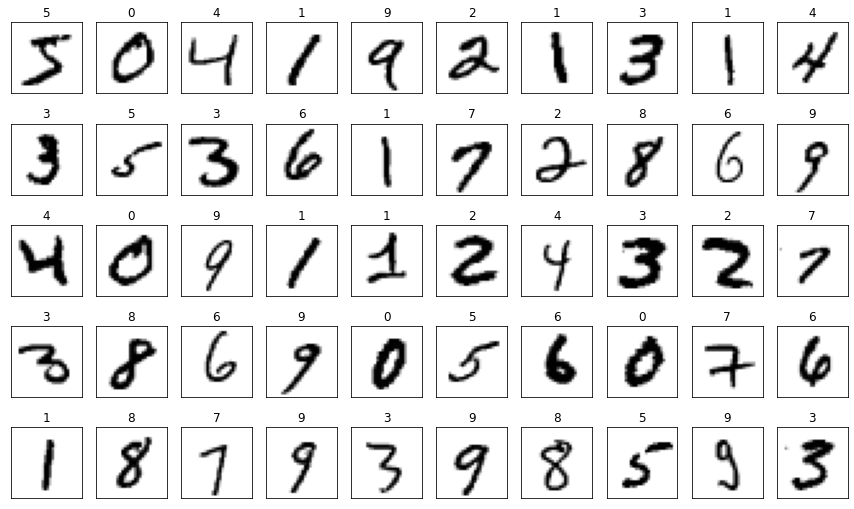

In [120]:
fig = plt.figure(figsize = (15, 9))

for i in range(50):
    plt.subplot(5, 10, 1+i)
    plt.title(y_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i].reshape(28,28), cmap='binary')

**Preprocessing Data**

Apply one-hot encoding on the labels

In [121]:
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

print("First ten entries of y_train:\n {}\n".format(y_train[0:10]))
print("First ten rows of one-hot y_train:\n {}".format(y_train_encoded[0:10,]))

First ten entries of y_train:
 [5 0 4 1 9 2 1 3 1 4]

First ten rows of one-hot y_train:
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [122]:
print('y_train_encoded shape: ', y_train_encoded.shape)
print('y_test_encoded shape: ', y_test_encoded.shape)

y_train_encoded shape:  (60000, 10)
y_test_encoded shape:  (10000, 10)


**Reshape the images to 1D arrays**

Reshape the images from shape (28, 28) 2D arrays to shape (784, ) vectors (1D arrays).

In [123]:
# Before reshape:
print('x_train:\t{}'.format(x_train.shape))
print('x_test:\t\t{}'.format(x_test.shape))

x_train:	(60000, 28, 28)
x_test:		(10000, 28, 28)


In [124]:
np.set_printoptions(linewidth=np.inf)
print("{}".format(x_train[2020]))

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0 167 208  19   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  13 235 254  99   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  74 254 234   4   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 154 254 145   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 224 254  92   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  51 245 211  13   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2 169 254 101   0   0   0   0   0   

In [125]:
# Reshape the images:
x_train_reshaped = np.reshape(x_train, (60000, 784))
x_test_reshaped = np.reshape(x_test, (10000, 784))

# After reshape:
print('x_train_reshaped shape: ', x_train_reshaped.shape)
print('x_test_reshaped shape: ', x_test_reshaped.shape)

x_train_reshaped shape:  (60000, 784)
x_test_reshaped shape:  (10000, 784)




1.   Each element in an image is a pixel value
2.   Pixel values range from 0 to 255
3.   0 = White
4.   355 = Black

**Review unique values with set from 1st image**


In [126]:
print(set(x_train_reshaped[0]))

{0, 1, 2, 3, 9, 11, 14, 16, 18, 23, 24, 25, 26, 27, 30, 35, 36, 39, 43, 45, 46, 49, 55, 56, 64, 66, 70, 78, 80, 81, 82, 90, 93, 94, 107, 108, 114, 119, 126, 127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166, 170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205, 207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244, 247, 249, 250, 251, 252, 253, 255}


**Rescale the elements of the reshaped images**

Rescale the elements between [0 and 1]

In [127]:
x_train_norm = x_train_reshaped.astype('float32') / 255
x_test_norm = x_test_reshaped.astype('float32') / 255

# Take a look at the first reshaped and normalized training image:
print(set(x_train_norm[0]))

{0.0, 0.011764706, 0.53333336, 0.07058824, 0.49411765, 0.6862745, 0.101960786, 0.6509804, 1.0, 0.96862745, 0.49803922, 0.11764706, 0.14117648, 0.36862746, 0.6039216, 0.6666667, 0.043137256, 0.05490196, 0.03529412, 0.85882354, 0.7764706, 0.7137255, 0.94509804, 0.3137255, 0.6117647, 0.41960785, 0.25882354, 0.32156864, 0.21960784, 0.8039216, 0.8666667, 0.8980392, 0.7882353, 0.52156866, 0.18039216, 0.30588236, 0.44705883, 0.3529412, 0.15294118, 0.6745098, 0.88235295, 0.99215686, 0.9490196, 0.7647059, 0.2509804, 0.19215687, 0.93333334, 0.9843137, 0.74509805, 0.7294118, 0.5882353, 0.50980395, 0.8862745, 0.105882354, 0.09019608, 0.16862746, 0.13725491, 0.21568628, 0.46666667, 0.3647059, 0.27450982, 0.8352941, 0.7176471, 0.5803922, 0.8117647, 0.9764706, 0.98039216, 0.73333335, 0.42352942, 0.003921569, 0.54509807, 0.67058825, 0.5294118, 0.007843138, 0.31764707, 0.0627451, 0.09411765, 0.627451, 0.9411765, 0.9882353, 0.95686275, 0.83137256, 0.5176471, 0.09803922, 0.1764706}


Creating the DNN Model

In [128]:
model = Sequential([
    Dense(input_shape=[784], units=128, activation = tf.nn.relu,kernel_regularizer=tf.keras.regularizers.L2(0.001)),
    Dense(name = "output_layer", units = 10, activation = tf.nn.softmax)
])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


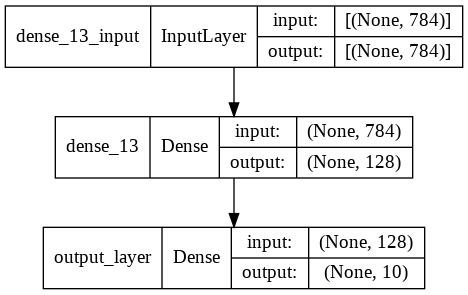

In [129]:
keras.utils.plot_model(model, "mnist_model.png", show_shapes=True) 

**Compile the DNN model**

In [130]:
model.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

Train the DNN model

In [131]:
history = model.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3967 - accuracy: 0.9152 - val_loss: 0.2699 - val_accuracy: 0.9451
Epoch 2/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2374 - accuracy: 0.9526 - val_loss: 0.2112 - val_accuracy: 0.9594
Epoch 3/200
1500/1500 [==============================] - 5s 4ms/step - loss: 0.2002 - accuracy: 0.9604 - val_loss: 0.1785 - val_accuracy: 0.9662
Epoch 4/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1827 - accuracy: 0.9641 - val_loss: 0.1840 - val_accuracy: 0.9639
Epoch 5/200
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1698 - accuracy: 0.9675 - val_loss: 0.1726 - val_accuracy: 0.9657


**Evaluate the DNN model**

In [132]:
loss, accuracy = model.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.1733 - accuracy: 0.9665
test set accuracy:  96.64999842643738


**Making Predictions**

In [133]:
preds = model.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


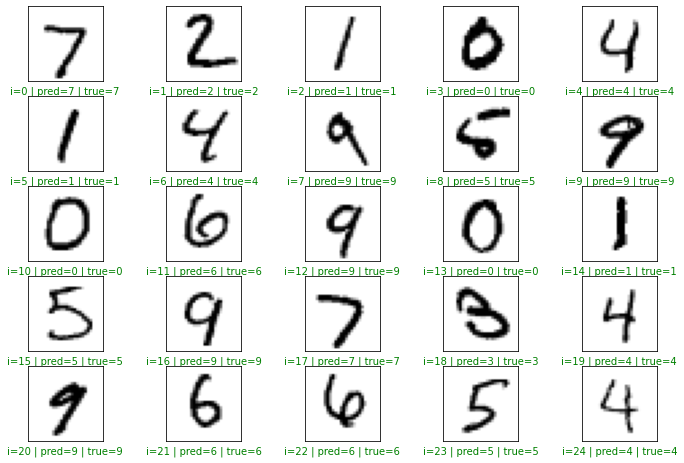

In [134]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

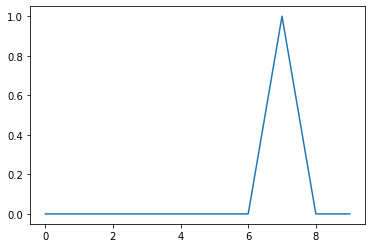

In [135]:
index = 17

plt.plot(preds[index])
plt.show()

**Reviewing Performance**

In [136]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot performance metrics**

In [137]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

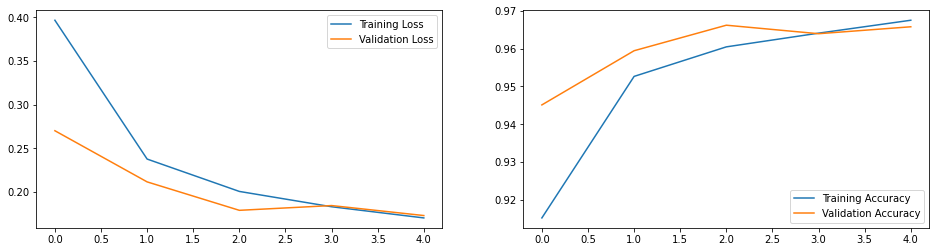

In [138]:
losses = history.history['loss']
accs = history.history['accuracy']
val_losses = history.history['val_loss']
val_accs = history.history['val_accuracy']
epochs = len(losses)

plt.figure(figsize=(16, 4))
for i, metrics in enumerate(zip([losses, accs], [val_losses, val_accs], ['Loss', 'Accuracy'])):
    plt.subplot(1, 2, i + 1)
    plt.plot(range(epochs), metrics[0], label='Training {}'.format(metrics[2]))
    plt.plot(range(epochs), metrics[1], label='Validation {}'.format(metrics[2]))
    plt.legend()
plt.show()

In [139]:
pred1= model.predict(x_test_norm)
pred1=np.argmax(pred1, axis=1)

print_validation_report(y_test, pred1)

Classification Report
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       980
           1       0.98      0.99      0.98      1135
           2       0.98      0.94      0.96      1032
           3       0.94      0.98      0.96      1010
           4       0.98      0.96      0.97       982
           5       0.99      0.94      0.96       892
           6       0.98      0.97      0.97       958
           7       0.94      0.98      0.96      1028
           8       0.94      0.97      0.96       974
           9       0.98      0.94      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

Accuracy Score: 0.9665
Root Mean Square Error: 0.7978721702127478


**After training the model, we group the 60,000 activation values of the hidden node for the (original) set of training images by the 10 predicted classes and visualize these sets of values using a boxplot.** 


Getting the activation values of the hidden nodes

In [140]:
# Extracts the outputs of the 2 layers:
layer_outputs = [layer.output for layer in model.layers]

# Creates a model that will return these outputs, given the model input:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

print(f"There are {len(layer_outputs)} layers")
layer_outputs; # description of the layers

There are 2 layers


In [141]:
# Get the outputs of all the hidden nodes for each of the 60000 training images
activations = activation_model.predict(x_train_norm)
hidden_layer_activation = activations[0]
output_layer_activations = activations[1]
hidden_layer_activation.shape   #  each of the 128 hidden nodes has one activation value per training image

(60000, 128)

In [142]:
output_layer_activations.shape

(60000, 10)

In [143]:
print(f"The maximum activation value of the hidden nodes in the hidden layer is \
{hidden_layer_activation.max()}")

The maximum activation value of the hidden nodes in the hidden layer is 5.1264238357543945


In [144]:
# Some stats about the output layer as an aside...
np.set_printoptions(suppress = True)  # display probabilities as decimals and NOT in scientific notation
ouput_layer_activation = activations[1]
print(f"The output node has shape {ouput_layer_activation.shape}")
print(f"The output for the first image are {ouput_layer_activation[0].round(4)}")
print(f"The sum of the probabilities is (approximately) {ouput_layer_activation[0].sum()}")

The output node has shape (60000, 10)
The output for the first image are [0.    0.    0.    0.203 0.    0.797 0.    0.    0.    0.   ]
The sum of the probabilities is (approximately) 1.0


Creating a dataframe with the activation values and the class labels

In [145]:
#Get the dataframe of all the node values
activation_data = {'actual_class':y_train}
for k in range(0,128): 
    activation_data[f"act_val_{k}"] = hidden_layer_activation[:,k]

activation_df = pd.DataFrame(activation_data)
activation_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.000,0.000,4.000,1.000,9.000,2.000,1.000,3.000,1.000,4.000,3.000,5.000,3.000,6.000,1.000
act_val_0,0.000,0.000,0.544,0.000,0.642,0.000,0.000,0.000,0.000,0.249,0.000,0.000,0.000,0.000,0.000
act_val_1,0.830,0.995,0.043,0.569,0.285,0.539,0.000,2.364,0.000,0.000,1.584,0.000,0.343,0.063,0.000
act_val_2,0.172,1.461,0.000,0.111,0.000,0.257,0.000,0.000,0.000,0.000,1.545,0.866,0.512,0.761,0.000
act_val_3,0.352,0.000,0.270,0.710,0.406,0.000,0.608,0.865,0.469,0.163,0.835,0.284,0.901,0.206,0.541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
act_val_123,0.203,0.000,0.000,0.592,0.000,0.000,0.000,0.000,0.000,0.722,0.000,0.962,0.000,0.001,0.022
act_val_124,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
act_val_125,0.014,0.435,0.327,0.000,0.472,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
act_val_126,0.000,0.000,0.000,0.784,0.601,0.000,0.373,0.042,0.001,0.000,0.706,0.000,0.384,0.000,0.012


**Visualizing the activation values with boxplots**

The activation values of the first hidden node, combined with the corresponding class labels into a DataFrame are used to create boxplots.

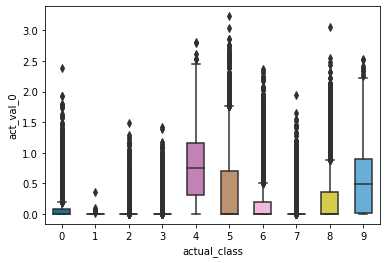

In [146]:
# To see how closely the hidden node activation values correlate with the class labels
# Let us use seaborn for the boxplots this time.
bplot = sns.boxplot(y='act_val_0', x='actual_class', 
                 data=activation_df[['act_val_0','actual_class']], 
                 width=0.5,
                 palette="colorblind")

In [147]:
# displaying the range of activation values for each class labels
activation_df.groupby("actual_class")["act_val_0"].apply(lambda x: [round(min(x.tolist()),2),
 round(max(x.tolist()),2)]).reset_index().rename(columns={"act_val_0": "range_of_act_values"})

,actual_class,range_of_act_values
0,0,"[0.0, 2.38]"
1,1,"[0.0, 0.35]"
2,2,"[0.0, 1.49]"
3,3,"[0.0, 1.42]"
4,4,"[0.0, 2.81]"
5,5,"[0.0, 3.23]"
6,6,"[0.0, 2.37]"
7,7,"[0.0, 1.94]"
8,8,"[0.0, 3.05]"
9,9,"[0.0, 2.53]"


**Create a dataframe with the pixel values and class labels**

In [148]:
#Get the dataframe of all the pixel values
pixel_data = {'actual_class':y_train}
for k in range(0,128): 
    pixel_data[f"pix_val_{k}"] = x_train_norm[:,k]
pixel_df = pd.DataFrame(pixel_data)
pixel_df.head(15).round(3).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
actual_class,5.0,0.0,4.0,1.0,9.0,2.0,1.000,3.0,1.0,4.0,3.000,5.0,3.0,6.000,1.0
pix_val_0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_1,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_2,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
pix_val_3,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pix_val_123,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.0,0.0,0.165,0.0,0.0,0.000,0.0
pix_val_124,0.0,0.0,0.0,0.0,0.0,0.0,0.569,0.0,0.0,0.0,0.463,0.0,0.0,0.000,0.0
pix_val_125,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.0,0.0,0.859,0.0,0.0,0.090,0.0
pix_val_126,0.0,0.0,0.0,0.0,0.0,0.0,0.827,0.0,0.0,0.0,0.651,0.0,0.0,0.773,0.0


In [149]:
pixel_df.pix_val_77.value_counts()

0.000000    59720
1.000000       25
0.996078       13
0.992157        9
0.050980        6
            ...  
0.392157        1
0.717647        1
0.215686        1
0.925490        1
0.937255        1
Name: pix_val_77, Length: 150, dtype: int64

In [150]:
pixel_df.pix_val_78.value_counts()

0.000000    59862
1.000000        6
0.141176        4
0.960784        4
0.992157        4
            ...  
0.749020        1
0.717647        1
0.345098        1
0.968627        1
0.654902        1
Name: pix_val_78, Length: 97, dtype: int64

#**END OF EXPERIMENT 1**

Please note I have moved the confustion matrix to experiment 2 below

#**BEGINNING OF EXPERIMENT 2**

A scatter plot to visualize the predicive power of the pixel values at two fixed locations in the image.

A scatter plot to determine the correlation between the pix_val_77 and pix_val_78 values and the actual_class values.

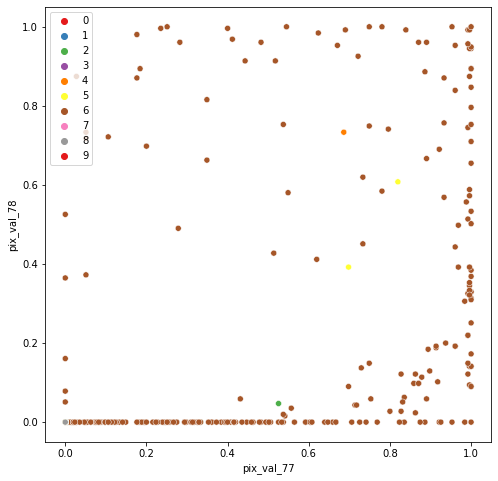

In [151]:
plt.figure(figsize=(8, 8))
color = sns.color_palette("hls", 10)
sns.scatterplot(x="pix_val_77", y="pix_val_78", hue="actual_class",  palette="Set1", data = pixel_df, legend="full")
plt.legend(loc='upper left');

**Create the confusion matrix**

In [152]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(model.predict(x_test_norm), axis=-1)
pred_classes;

In [153]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap="YlGnBu")

,0,1,2,3,4,5,6,7,8,9
0,0.00%,0.00%,0.00%,0.01%,0.00%,0.00%,0.00%,99.98%,0.00%,0.00%
1,0.01%,0.00%,99.88%,0.09%,0.00%,0.00%,0.00%,0.00%,0.01%,0.00%
2,0.00%,98.85%,0.15%,0.09%,0.01%,0.04%,0.15%,0.17%,0.53%,0.01%
3,99.95%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.05%,0.00%,0.00%
4,0.00%,0.00%,0.01%,0.00%,98.00%,0.00%,0.01%,0.68%,0.01%,1.29%
5,0.00%,99.70%,0.01%,0.03%,0.00%,0.00%,0.00%,0.16%,0.10%,0.00%
6,0.00%,0.00%,0.00%,0.00%,97.64%,0.03%,0.01%,0.80%,0.66%,0.87%
7,0.00%,0.02%,0.02%,3.72%,0.86%,0.01%,0.00%,0.48%,0.08%,94.80%
8,0.17%,0.00%,0.31%,0.01%,0.00%,63.80%,35.63%,0.00%,0.07%,0.00%
9,0.00%,0.00%,0.00%,0.01%,0.33%,0.00%,0.00%,2.95%,0.15%,96.56%


**Visualize the confusion matrix**

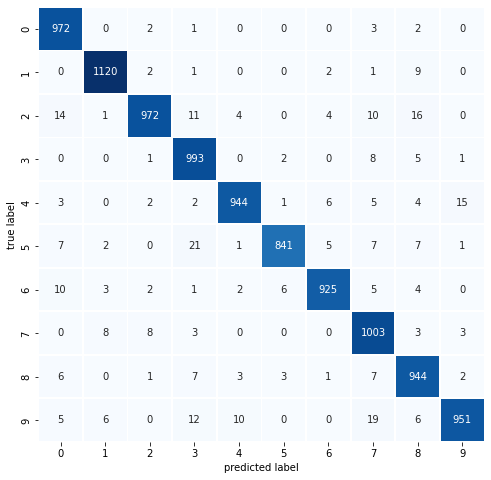

In [154]:
plot_confusion_matrix(y_test,pred_classes)

A good confusion matrix with 28 fours misclassified as nines and 10 nines classified as fours.

Misclassifications displayed below.

In [155]:
def plot_digits(instances, pos, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    pos.imshow(image, cmap = 'binary', **options)
    pos.axis("off")

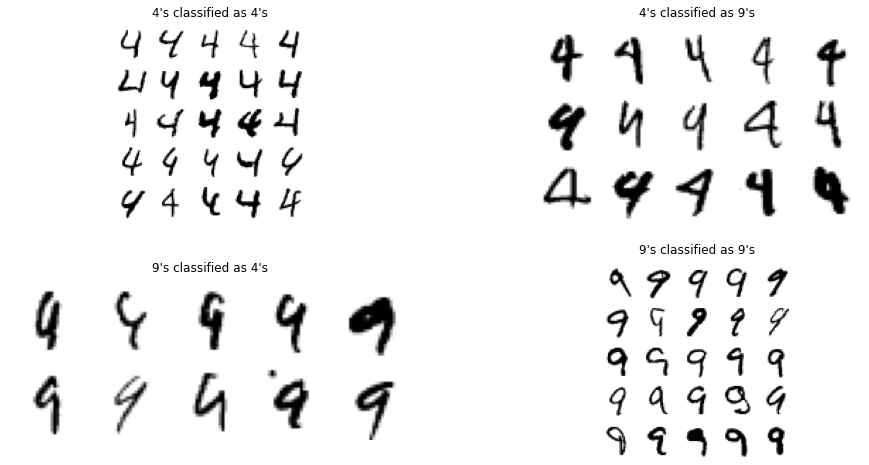

In [156]:
cl_a, cl_b = 4, 9
X_aa = x_test_norm[(y_test == cl_a) & (pred_classes == cl_a)]
X_ab = x_test_norm[(y_test == cl_a) & (pred_classes == cl_b)]
X_ba = x_test_norm[(y_test == cl_b) & (pred_classes == cl_a)]
X_bb = x_test_norm[(y_test == cl_b) & (pred_classes == cl_b)]

plt.figure(figsize=(16,8))

p1 = plt.subplot(221)
p2 = plt.subplot(222)
p3 = plt.subplot(223)
p4 = plt.subplot(224)

plot_digits(X_aa[:25], p1, images_per_row=5);
plot_digits(X_ab[:25], p2, images_per_row=5);
plot_digits(X_ba[:25], p3, images_per_row=5);  
plot_digits(X_bb[:25], p4, images_per_row=5);


p1.set_title(f"{cl_a}'s classified as {cl_a}'s")
p2.set_title(f"{cl_a}'s classified as {cl_b}'s")
p3.set_title(f"{cl_b}'s classified as {cl_a}'s")
p4.set_title(f"{cl_b}'s classified as {cl_b}'s")

# plt.savefig("error_analysis_digits_plot_EXP1_valid")

plt.show()

#**Creating the Second DNN for Experiment 2 with a hidden layer that has 2 nodes**

Please note that the second DNN below is m2.



In [157]:
from tensorflow.keras import models
from tensorflow.keras import layers

m2 = models.Sequential()
m2.add(layers.Dense(2, activation='relu', input_shape=(28 * 28,)))
m2.add(layers.Dense(10, activation='softmax'))   

m2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 2)                 1570      
                                                                 
 dense_15 (Dense)            (None, 10)                30        
                                                                 
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


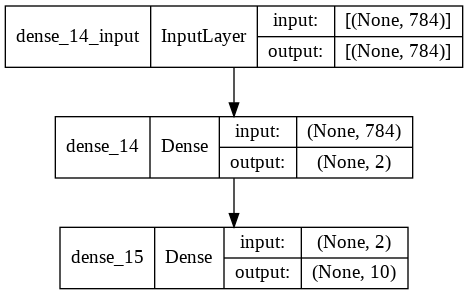

In [158]:
keras.utils.plot_model(m2, "mnist_model.png", show_shapes=True) 

**Compile the Second DNN model**

In [159]:
m2.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

Train the Second DNN model

In [160]:
history = m2.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 1.6431 - accuracy: 0.3811 - val_loss: 1.4081 - val_accuracy: 0.5035
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.3220 - accuracy: 0.5239 - val_loss: 1.2319 - val_accuracy: 0.5532
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.2165 - accuracy: 0.5533 - val_loss: 1.1823 - val_accuracy: 0.5600
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1754 - accuracy: 0.5752 - val_loss: 1.1433 - val_accuracy: 0.5918
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1378 - accuracy: 0.6100 - val_loss: 1.1078 - val_accuracy: 0.6327
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.1061 - accuracy: 0.6305 - val_loss: 1.0801 - val_accuracy: 0.6438
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 1.0848 - accuracy: 0.6474 - val_loss: 1.0588 - val_ac

**Evaluate the Second DNN model**

In [161]:
loss, accuracy = m2.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 1.0553 - accuracy: 0.6613
test set accuracy:  66.1300003528595


**Accuracy dropped from 96.65% from the first DNN model to 66.13% in the m2 second DNN**

**Making Predictions**

In [163]:
preds = m2.predict(x_test_norm)
print('shape of preds: ', preds.shape)

shape of preds:  (10000, 10)


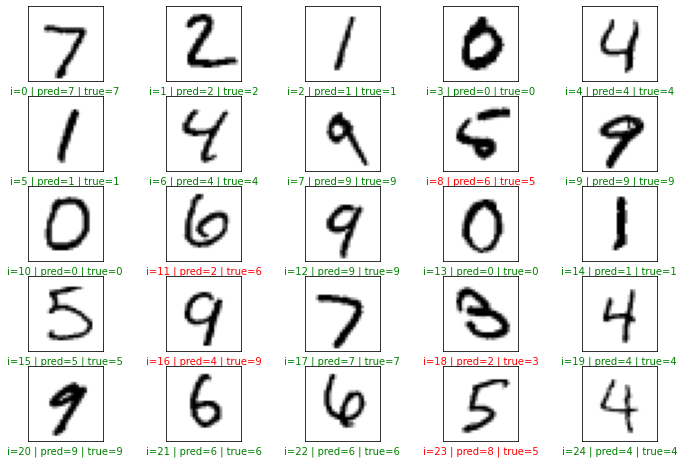

In [164]:
plt.figure(figsize = (12, 8))

start_index = 0

for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    pred = np.argmax(preds[start_index + i])
    actual = np.argmax(y_test_encoded[start_index + i])
    col = 'g'
    if pred != actual:
        col = 'r'
    plt.xlabel('i={} | pred={} | true={}'.format(start_index + i, pred, actual), color = col)
    plt.imshow(x_test[start_index + i], cmap='binary')
plt.show()

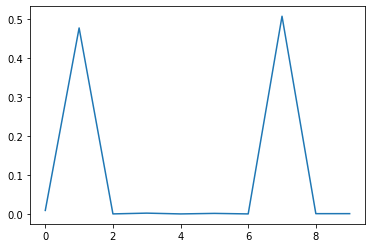

In [165]:
index = 17

plt.plot(preds[index])
plt.show()

**Reviewing Performance**

In [166]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plot performance metrics**

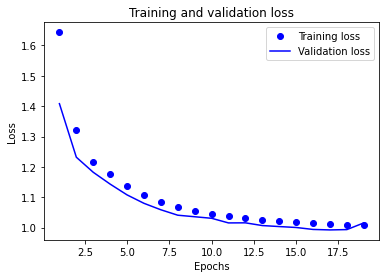

In [168]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

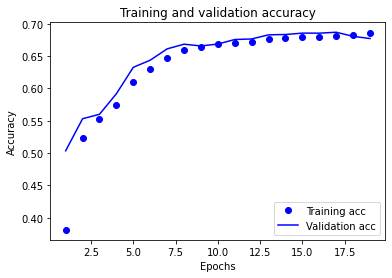

In [169]:
plt.clf()   # clear figure
acc_values = history_dict['accuracy']
# val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

**Confusion Matrix**

In [173]:
# Get the predicted classes:
# pred_classes = model.predict_classes(x_train_norm)# give deprecation warning
pred_classes = np.argmax(m2.predict(x_test_norm), axis=-1)
pred_classes;

In [174]:
conf_mx = tf.math.confusion_matrix(y_test, pred_classes)
conf_mx;

cm = sns.light_palette((260, 75, 60), input="husl", as_cmap=True)
df = pd.DataFrame(preds[0:20], columns = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])
df.style.format("{:.2%}").background_gradient(cmap="BuGn")

,0,1,2,3,4,5,6,7,8,9
0,0.07%,9.69%,0.01%,0.06%,0.00%,0.12%,0.00%,88.81%,0.13%,1.11%
1,0.01%,0.00%,97.87%,1.92%,0.00%,0.11%,0.08%,0.00%,0.01%,0.00%
2,4.97%,80.39%,0.26%,3.31%,0.00%,3.34%,0.01%,4.89%,2.21%,0.62%
3,73.93%,8.57%,0.39%,14.24%,0.00%,2.44%,0.00%,0.00%,0.42%,0.00%
4,0.00%,0.01%,0.11%,0.02%,81.45%,0.38%,1.74%,0.00%,2.18%,14.11%
5,3.57%,81.03%,0.09%,1.63%,0.00%,1.41%,0.00%,11.12%,0.82%,0.33%
6,0.00%,0.01%,0.11%,0.02%,81.90%,0.37%,1.76%,0.00%,2.16%,13.66%
7,0.00%,0.59%,0.04%,0.04%,14.32%,0.36%,0.19%,12.00%,1.35%,71.12%
8,0.00%,0.00%,4.54%,0.45%,26.32%,4.89%,42.29%,0.00%,21.20%,0.30%
9,0.00%,0.44%,0.06%,0.04%,21.57%,0.44%,0.30%,5.25%,1.73%,70.16%


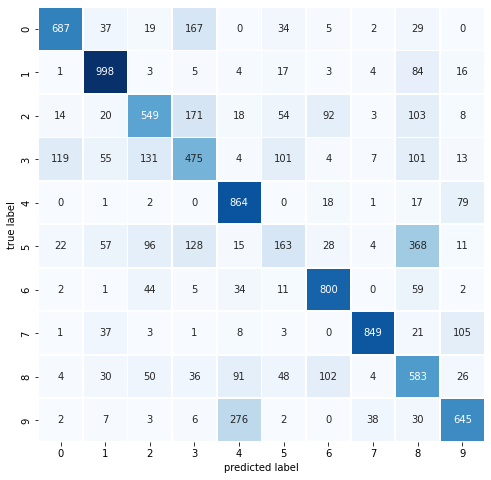

In [175]:
plot_confusion_matrix(y_test,pred_classes)

**Not so good confustion matrix in the second DNN m2 compared to the prior DNN model.**

**We will chose the first DNN model with 784 input nodes, one hidden node, and 10 output nodes that reference the 10 individual digit images.**

#**END OF EXPERIMENT 2**

#**BEGINNING OF EXPERIMENT 3**

**The first DNN Model has been chosen over the second DNN Model, m2.**

#**END OF EXPERIMENT 3**

#**BEGINNING OF EXPERIMENT 4**

**Feature Reduction and Model Optimization of first DNN model with PCA**

Please note the pixel_df below comes from the first DNN model and not m2

In [176]:
# Separating out the features
features = [*pixel_data][1:] # ['pix_val_0', 'pix_val_1',...]
x = pixel_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [178]:
pixel_pca_df = pd.concat([principalDf, pixel_df[['actual_class']]], axis = 1)

pixel_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,-0.332,0.035,5
1,-0.246,-0.044,0
2,-0.332,0.035,4
3,-0.332,0.035,1
4,-0.332,0.035,9


In [179]:
pca.explained_variance_ratio_

array([0.403, 0.164], dtype=float32)

**The PCA decomposition reduces the number of features from 784 features to 2 features, and the scatter plot below visualizes the predictive power of the two principal component values.**

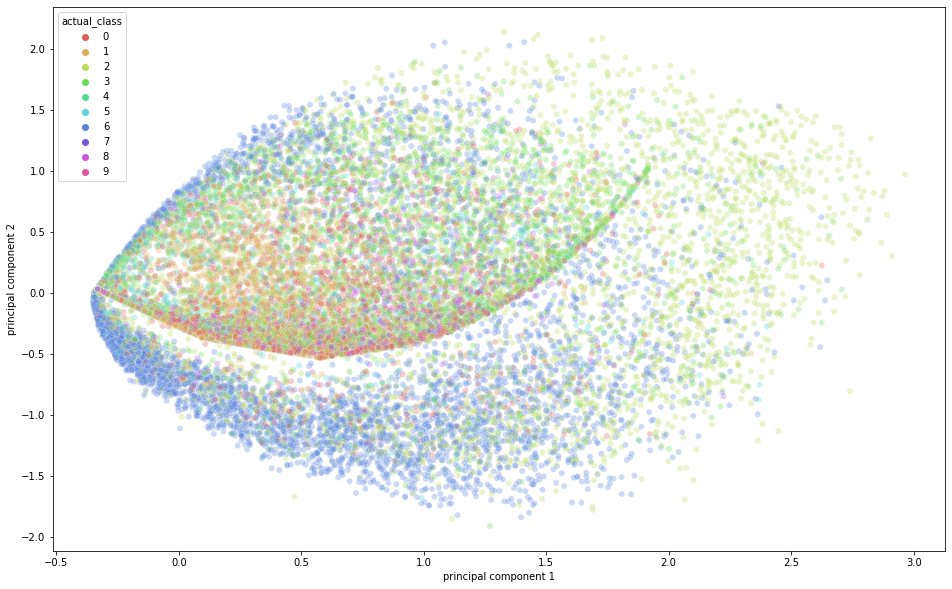

In [180]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=pixel_pca_df,
    legend="full",
    alpha=0.3
);

Reduce the activation features from 128 (= num of hidden nodes) to 2 with PCA decomposition

In [181]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf.head().round(3)

,principal component 1,principal component 2
0,0.541,-0.551
1,4.344,1.270
2,-1.246,1.076
3,-1.347,-2.377
4,-2.407,2.185


In [182]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

,principal component 1,principal component 2,actual_class
0,0.541,-0.551,5
1,4.344,1.270,0
2,-1.246,1.076,4
3,-1.347,-2.377,1
4,-2.407,2.185,9


In [183]:
pca.explained_variance_ratio_

array([0.155, 0.125], dtype=float32)

**The 2 principal components summed together 0.155 + 0.125 = 0.28 explained variance**

Below is a scatter plot to visualize the predictive power of two principal component values.

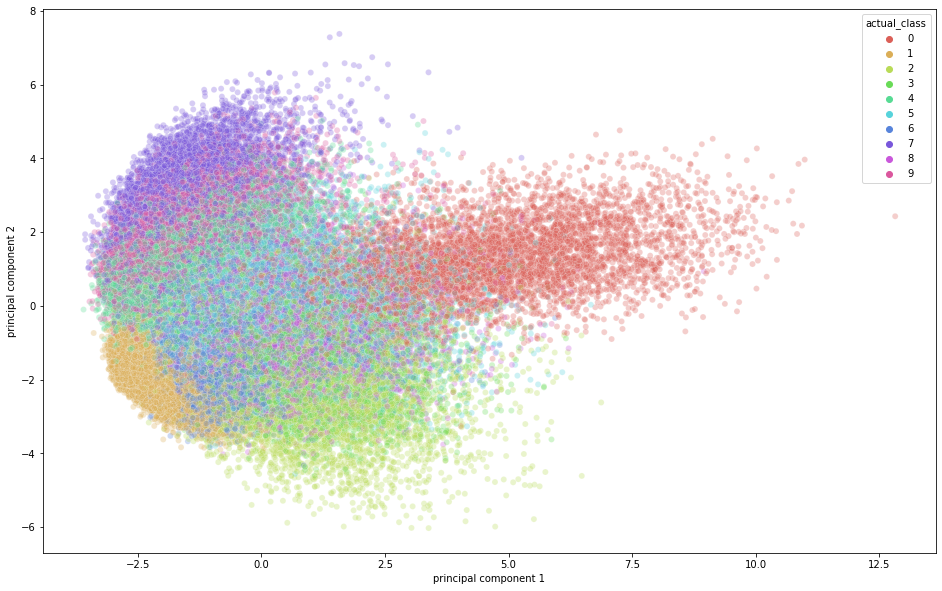

In [184]:
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="principal component 1", y="principal component 2",
    hue="actual_class",
    palette=sns.color_palette("hls", 10),
    data=activation_pca_df,
    legend="full",
    alpha=0.3
);

**PCA decomposition to reduce the (activation) features from 128 (= num of hidden nodes) to 3**

In [185]:
# Separating out the features
features = [*activation_data][1:] # ['act_val_0', 'act_val_1',...]
x = activation_df.loc[:, features].values 

pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pca-one', 'pca-two', 'pca-three'])
principalDf.head(10).round(3).T

,0,1,2,3,4,5,6,7,8,9
pca-one,0.541,4.344,-1.246,-1.347,-2.407,-0.294,-2.590,2.824,-2.868,-1.929
pca-two,-0.551,1.270,1.076,-2.377,2.185,0.427,-1.804,-0.914,-0.948,0.604
pca-three,-2.431,0.800,1.292,-0.243,-0.853,1.897,-0.925,-3.586,-0.505,2.982


In [186]:
pca.explained_variance_ratio_

array([0.155, 0.125, 0.104], dtype=float32)

The 3 principal components summed together 0.155 + 0.125 + 0.104 = 0.384 explained variance.

In [187]:
activation_pca_df = pd.concat([principalDf, activation_df[['actual_class']]], axis = 1)
activation_pca_df.head().round(3)

,pca-one,pca-two,pca-three,actual_class
0,0.541,-0.551,-2.431,5
1,4.344,1.270,0.800,0
2,-1.246,1.076,1.292,4
3,-1.347,-2.377,-0.243,1
4,-2.407,2.185,-0.853,9


**A scatter plot to visualize the predictive power of three principal component values**

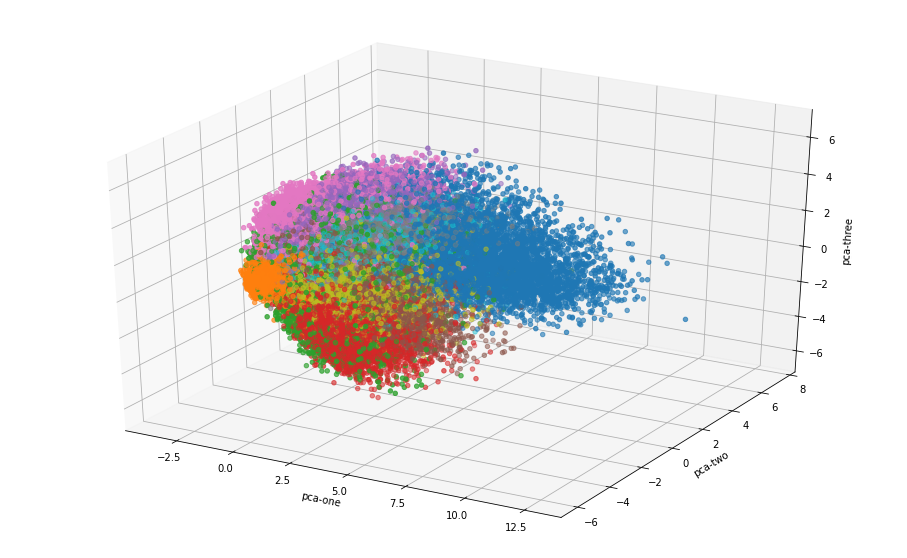

In [188]:
# uncomment to to able to rotate the graph...
# %matplotlib notebook   
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=activation_pca_df.loc[:,"pca-one"], 
    ys=activation_pca_df.loc[:,"pca-two"], 
    zs=activation_pca_df.loc[:,"pca-three"], 
    c=activation_pca_df.loc[:,"actual_class"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

A t-Distributed Stochastic Neighbor Embedding (t-SNE) to reduce the (activation) features from 128 (= num of hidden nodes) to 2

In [189]:
activation_df.shape

(60000, 129)

In [190]:
N=60000
activation_df_subset = activation_df.iloc[:N].copy()
activation_df_subset.shape

(60000, 129)

In [191]:
data_subset = activation_df_subset[features].values
data_subset.shape

(60000, 128)

In [192]:
%%time
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 60000 samples in 0.007s...
[t-SNE] Computed neighbors for 60000 samples in 106.197s...
[t-SNE] Computed conditional probabilities for sample 1000 / 60000
[t-SNE] Computed conditional probabilities for sample 2000 / 60000
[t-SNE] Computed conditional probabilities for sample 3000 / 60000
[t-SNE] Computed conditional probabilities for sample 4000 / 60000
[t-SNE] Computed conditional probabilities for sample 5000 / 60000
[t-SNE] Computed conditional probabilities for sample 6000 / 60000
[t-SNE] Computed conditional probabilities for sample 7000 / 60000
[t-SNE] Computed conditional probabilities for sample 8000 / 60000
[t-SNE] Computed conditional probabilities for sample 9000 / 60000
[t-SNE] Computed conditional probabilities for sample 10000 / 60000
[t-SNE] Computed conditional probabilities for sample 11000 / 60000
[t-SNE] Computed conditional probabilities for sample 12000 / 60000
[t-SNE] Computed conditional probabilities for 

In [193]:
tsne_results = (tsne_results - tsne_results.min()) / (tsne_results.max() - tsne_results.min())

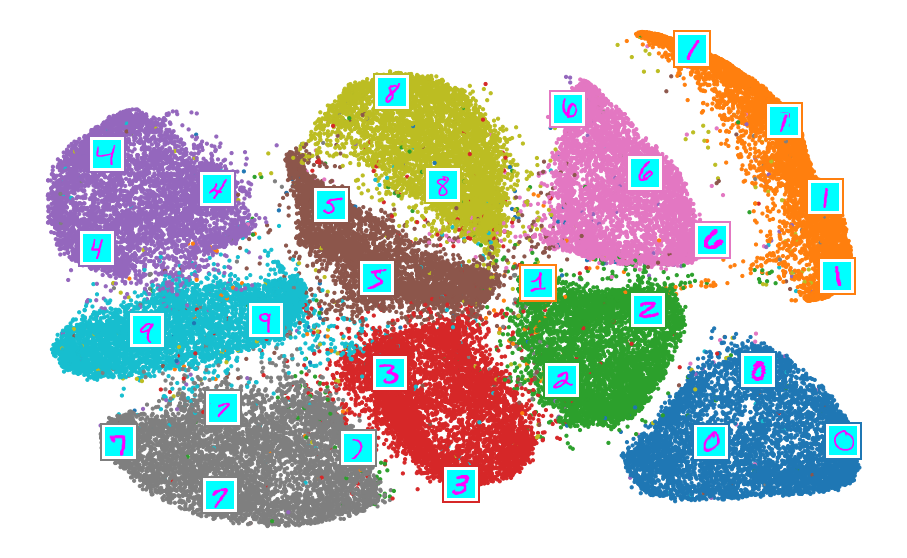

In [194]:
cmap = plt.cm.tab10
plt.figure(figsize=(16,10))
plt.scatter(tsne_results[:,0],tsne_results[:,1], c=y_train, s=10, cmap=cmap)

image_positions = np.array([[1., 1.]])
for index, position in enumerate(tsne_results):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_train[index], cmap="cool"),
            position, bboxprops={"edgecolor": cmap(y_train[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

#**END OF EXPERIMENT 4**

#**BEGINNING OF EXPERIMENT 5**

**A Random Forest Classifier for the relative importance of the 784 feature, i.e. pixels in the 28 by 28 dimensional images for the training set of MNIST images and select the top 70 features or pixels.  We will use the first DNN model, not m2.**

In [195]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train_norm,y_train_encoded)

RandomForestClassifier(random_state=42)

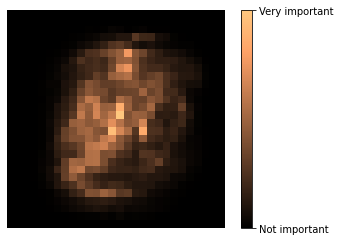

In [197]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = 'copper',
               interpolation="nearest")
    plt.axis("off")

plot_digit(rnd_clf.feature_importances_)
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])
plt.show()

In [198]:
n = 70
imp_arr = rnd_clf.feature_importances_
idx = (-imp_arr).argsort()[:n]          # get the indices of the 70 "most important" features/pixels
len(idx)

70

In [199]:
# Create training and test images using just the 70 pixel locations obtained above
train_images_sm = x_train_norm[:,idx]
test_images_sm = x_test_norm[:,idx]
train_images_sm.shape, test_images_sm.shape # the reduced images have dimension 70

((60000, 70), (10000, 70))

In [200]:
# to convert an index n, 0<= n < 784
def pair(n,size):
    x = n//size 
    y = n%size
    return x,y

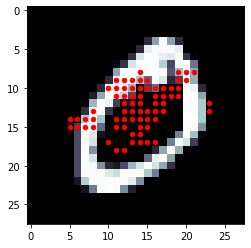

In [201]:
plt.imshow(x_train_norm[1].reshape(28,28),cmap='bone')
x, y = np.array([pair(k,28) for k in idx]).T
plt.scatter(x,y,color='red',s=20)

#**BEGINNING OF EXPERIMENT 6**

In [204]:
from tensorflow.keras import models
from tensorflow.keras import layers

m3 = models.Sequential()
m3.add(layers.Dense(3, activation='relu', input_shape=(28 * 28,)))
m3.add(layers.Dense(10, activation='softmax'))   

m3.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 3)                 2355      
                                                                 
 dense_19 (Dense)            (None, 10)                40        
                                                                 
Total params: 2,395
Trainable params: 2,395
Non-trainable params: 0
_________________________________________________________________


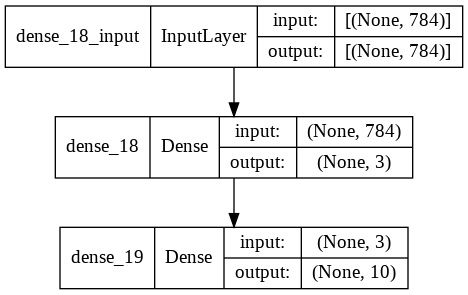

In [205]:
keras.utils.plot_model(m3, "mnist_model.png", show_shapes=True)

**Compile the m3 third DNN model**

In [208]:
m3.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

Train the m3 DNN model

In [209]:
history = m3.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 1.2835 - accuracy: 0.5666 - val_loss: 0.9653 - val_accuracy: 0.6910
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.9430 - accuracy: 0.6962 - val_loss: 0.8728 - val_accuracy: 0.7170
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8798 - accuracy: 0.7208 - val_loss: 0.8233 - val_accuracy: 0.7398
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8419 - accuracy: 0.7352 - val_loss: 0.7982 - val_accuracy: 0.7509
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.8149 - accuracy: 0.7455 - val_loss: 0.7731 - val_accuracy: 0.7649
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7907 - accuracy: 0.7583 - val_loss: 0.7386 - val_accuracy: 0.7738
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.7681 - accuracy: 0.7686 - val_loss: 0.7170 - val_ac

**Evaluate the DNN Model in Experiment 6**

In [210]:
loss, accuracy = m3.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.6980 - accuracy: 0.8005
test set accuracy:  80.0499975681305


#**END OF EXPERIMENT 6**

#**BEGINNING OF EXPERIMENT 7**

In [212]:
from tensorflow.keras import models
from tensorflow.keras import layers

m4 = models.Sequential()
m4.add(layers.Dense(4, activation='relu', input_shape=(28 * 28,)))
m4.add(layers.Dense(10, activation='softmax'))   

m4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


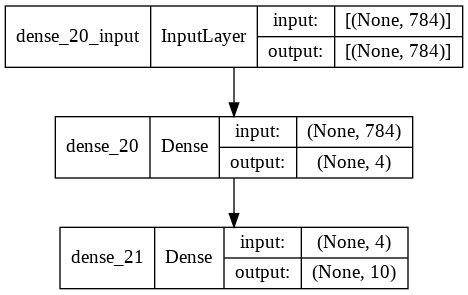

In [213]:
keras.utils.plot_model(m4, "mnist_model.png", show_shapes=True)

In [214]:
m4.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [215]:
history = m4.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 1.0641 - accuracy: 0.6383 - val_loss: 0.6419 - val_accuracy: 0.8048
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.6184 - accuracy: 0.8067 - val_loss: 0.5531 - val_accuracy: 0.8333
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5631 - accuracy: 0.8270 - val_loss: 0.5210 - val_accuracy: 0.8444
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5387 - accuracy: 0.8352 - val_loss: 0.5115 - val_accuracy: 0.8531
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5251 - accuracy: 0.8403 - val_loss: 0.5031 - val_accuracy: 0.8532
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5155 - accuracy: 0.8442 - val_loss: 0.4934 - val_accuracy: 0.8547
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.5087 - accuracy: 0.8455 - val_loss: 0.4838 - val_ac

In [216]:
loss, accuracy = m4.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.4935 - accuracy: 0.8572
test set accuracy:  85.7200026512146


#**END OF EXPERIMENT 7**

#**BEGINNING OF EXPERIMENT 8**

In [223]:
from tensorflow.keras import models
from tensorflow.keras import layers

m5 = models.Sequential()
m5.add(layers.Dense(7, activation='relu', input_shape=(28 * 28,)))
m5.add(layers.Dense(10, activation='softmax'))   

m4.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 4)                 3140      
                                                                 
 dense_21 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,190
Trainable params: 3,190
Non-trainable params: 0
_________________________________________________________________


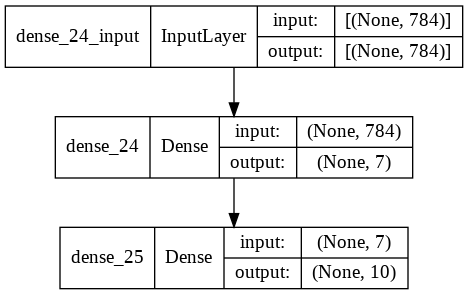

In [224]:
keras.utils.plot_model(m5, "mnist_model.png", show_shapes=True)

In [225]:
m5.compile(optimizer='rmsprop',           
               loss = 'categorical_crossentropy',
               metrics=['accuracy'])

In [226]:
history = m5.fit(
    x_train_norm
    ,y_train_encoded
    ,epochs = 200
    ,validation_split=0.20 
    ,callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2)] 
    )

Epoch 1/200
1500/1500 [==============================] - 4s 2ms/step - loss: 0.6886 - accuracy: 0.8029 - val_loss: 0.4148 - val_accuracy: 0.8796
Epoch 2/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4065 - accuracy: 0.8847 - val_loss: 0.3643 - val_accuracy: 0.8968
Epoch 3/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3740 - accuracy: 0.8964 - val_loss: 0.3420 - val_accuracy: 0.8996
Epoch 4/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3566 - accuracy: 0.9004 - val_loss: 0.3365 - val_accuracy: 0.9038
Epoch 5/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3434 - accuracy: 0.9052 - val_loss: 0.3284 - val_accuracy: 0.9078
Epoch 6/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3331 - accuracy: 0.9076 - val_loss: 0.3158 - val_accuracy: 0.9101
Epoch 7/200
1500/1500 [==============================] - 3s 2ms/step - loss: 0.3237 - accuracy: 0.9088 - val_loss: 0.3093 - val_ac

In [227]:
loss, accuracy = m5.evaluate(x_test_norm, y_test_encoded)
print('test set accuracy: ', accuracy * 100)

313/313 [==============================] - 1s 2ms/step - loss: 0.3113 - accuracy: 0.9195
test set accuracy:  91.94999933242798
